In [154]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ccxt
import datetime
import scipy.interpolate, scipy.optimize
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS


In [183]:
def getData(ticker, interval):
    binance = ccxt.binance()
    #tickerList = ["BTC", "ETH", "BNB", "ADA", "SAND", "DOT"]
    #currency = "/USDT"
    
    temp_ticker = binance.fetch_ticker(ticker)
    #print(temp_ticker)
    btc_usdt_ohlcv = binance.fetch_ohlcv(ticker,interval,limit=1000)
    #print(btc_usdt_ohlcv)

    #return data in dataframe format with correct columns
     
    dataf = pd.DataFrame(btc_usdt_ohlcv, columns =['time', 'open', 'high', 'low','close','volume']) 
    #print(dataf)
    
    
    dataf['MA7'] = dataf['close'].rolling(window=7).mean()
    dataf['MA10'] = dataf['close'].rolling(window=10).mean()
    dataf['MA30'] = dataf['close'].rolling(window=30).mean()
    dataf['MA100'] = dataf['close'].rolling(window=100).mean()
    dataf['MA200'] = dataf['close'].rolling(window=200).mean()
    
    #dataf['regression'] = pd.stats.ols.MovingOLS(y=dataf.close, x=dataf.time,window_type='rolling', window=7, intercept=True)
    
    reg = RollingOLS(dataf.time, dataf.close, window=7)
    rres = reg.fit()
    params = rres.params.copy()
    params.index = np.arange(1, params.shape[0] + 1)

    
    res = sm.OLS(dataf.time, dataf.close).fit()
    print(res.summary())
    
    
    #df['Y_hat'] = regression.y_predict
    return dataf

def getMarkets(exchangeid):
    exchange = ccxt.binance()
    
    markets = exchange.load_markets()
    
    for market in markets:
        print(market)

In [184]:
def sortData(Data):
    
    arr = np.array(Data)
    #close = np.array(unsortedData[4][:])
    #print(arr)
    print(arr[0][:])
    
    return arr

In [185]:
def plotData(dataf):
    dataf.time = pd.to_datetime(dataf.time,unit='ms')
    
    print(dataf)

    plt.plot(dataf.time,dataf.close, label="Price Close")
    plt.plot(dataf.time,dataf.MA7, label ="7MA")
    plt.plot(dataf.time,dataf.MA30, label="30MA")
    plt.plot(dataf.time,dataf.MA200, label="200MA")
    
    #plt.plot(dataf.time,dataf.volume, "o")
    #plt.xlim(10:1000)
    plt.xlim(dataf.time[100],dataf.time[200])
    
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title("BTC/USD")
    plt.legend();
    plt.show
    

In [186]:
def getUserInput():
    balance = input("What amount of money do you want to start with? ")
    ticker = input("What ticker ID do you want to evaluate? ")
    #potentially add feature to check against known ticker list? This would prevent errors
    plot = input("Please enter 1 if you would like to see a plot of the data. 0 for no plot")
    timeframe = input("What timeframe would you want to trade on?")
    
    return balance, ticker, plot, timeframe 

def calcAvg(price):
    sum = 0
    for row in range(len(price[1])):
        sum = sum + price[1][row]
    
    avg = sum / (len(price))
    #print(sum)
    return avg

def removeRow(buy_data, sell_list):
    #print(buy_data)

    for loc in range(len(sell_list)):
        position = buy_data[1].index(sell_list[loc])
        del buy_data[0][position]
        del buy_data[1][position]
        del buy_data[2][position]
    
    sell_list.clear()


In [187]:
def calc_dates(data_points, timeframe):
    conversion = {
        "1h", 3600000
        "2h", 7200000
        "4h", 14400000
        "24h", 86400000
        "1d", 86400000
        "2d", 172800000
        "4d", 345600000
        "7d", 604800000
        "1w", 604800000
    }
    
    return start_date

SyntaxError: invalid syntax (745899006.py, line 4)

In [188]:
def trendstrat(balance, ticker, timeframe)


            

SyntaxError: invalid syntax (713121640.py, line 1)

                                 OLS Regression Results                                
Dep. Variable:                   time   R-squared (uncentered):            -6092873.255
Model:                            OLS   Adj. R-squared (uncentered):       -6098972.228
Method:                 Least Squares   F-statistic:                             -999.0
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                        1.00
Time:                        16:06:29   Log-Likelihood:                         -27388.
No. Observations:                1000   AIC:                                  5.478e+04
Df Residuals:                     999   BIC:                                  5.478e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

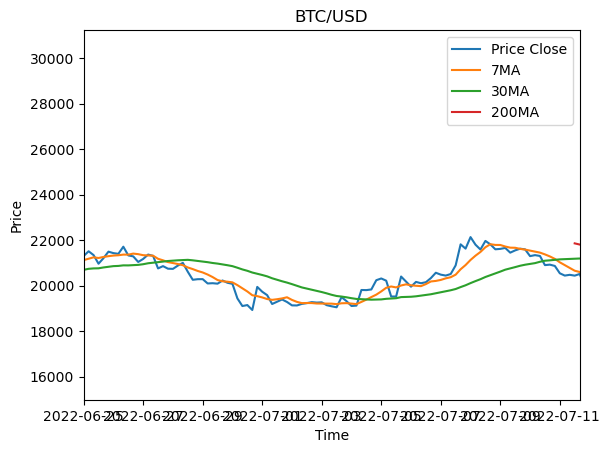

In [189]:
unsortedData = []

#ticker = getUserInput()
ticker = "BTC/USDT"
exchange = "Binance"
interval = "4h"
dataf = getData(ticker, interval)
#sortedData = sortData(unsortedData)
plotData(dataf)

balance = 1000



